In [13]:
import h5py as hp
import matplotlib.pyplot as plt
import hc_lib.plots.plot_lib as plib
import pickle as pkl
import numpy as np

In [2]:
paths = plib.getPaths('/lustre/cosinga/hcolor/output/')
#hiptls = plib.checkPkls(paths, {'fieldname':'hiptl'})
h2ptls = []
for p in paths:
    if 'h2ptl' in p:
        h2ptls.append(p)
h2ptls

['/lustre/cosinga/hcolor/output/pipe_tng100B_099S_0A_800R/results/h2ptlgrid_tng100B_099S_0A_800R.pkl',
 '/lustre/cosinga/hcolor/output/pipe_tng100B_099S_0A_800R/results/h2ptlXptl_tng100B_099S_0A_800R.pkl.hdf5',
 '/lustre/cosinga/hcolor/output/pipe_tng100B_099S_0A_800R/results/h2ptlgrid_tng100B_099S_0A_800R.pkl.hdf5']

# H_2 - Particle Slices

In [3]:
h2ptl = hp.File(h2ptls[2], 'r')

In [4]:
h2ptl.keys()

<KeysViewHDF5 ['GD14_CICW_pk', 'GD14_CICW_slc', 'GD14_CICW_xi', 'GD14_CICWrs_2Dpk', 'GD14_CICWrs_pk', 'GD14_CICWrs_slc', 'GD14_CICWrs_xi', 'GK11_CICW_pk', 'GK11_CICW_slc', 'GK11_CICW_xi', 'GK11_CICWrs_2Dpk', 'GK11_CICWrs_pk', 'GK11_CICWrs_slc', 'GK11_CICWrs_xi', 'K13_CICW_pk', 'K13_CICW_slc', 'K13_CICW_xi', 'K13_CICWrs_2Dpk', 'K13_CICWrs_pk', 'K13_CICWrs_slc', 'K13_CICWrs_xi', 'Nmodes_2Dpk', 'Nmodes_pk', 'S14_CICW_pk', 'S14_CICW_slc', 'S14_CICW_xi', 'S14_CICWrs_2Dpk', 'S14_CICWrs_pk', 'S14_CICWrs_slc', 'S14_CICWrs_xi', 'k_pk', 'kpar_2Dpk', 'kper_2Dpk', 'r_xi']>

In [10]:
slices = plib.fetchKeys(['slc'], list(h2ptl.keys()))

['GD14_CICW_slc',
 'GD14_CICWrs_slc',
 'GK11_CICW_slc',
 'GK11_CICWrs_slc',
 'K13_CICW_slc',
 'K13_CICWrs_slc',
 'S14_CICW_slc',
 'S14_CICWrs_slc']

## Slices, redshift and real space

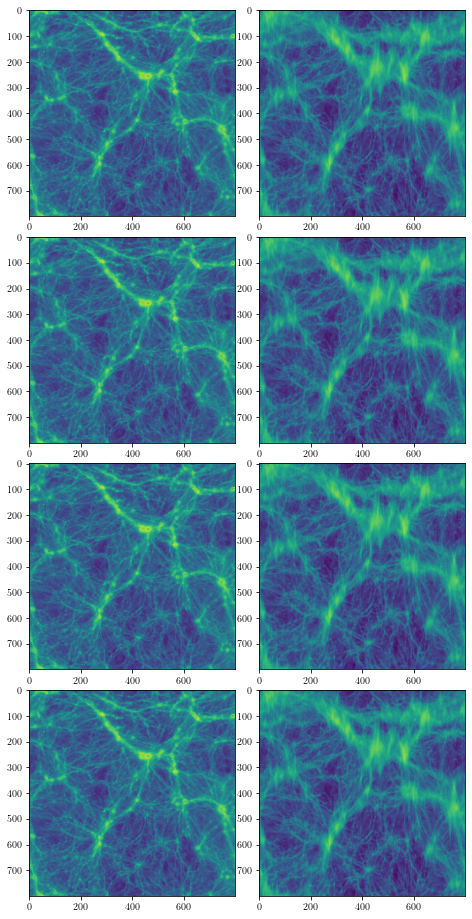

In [29]:
models = ['GD14', 'GK11', 'K13', 'S14']
space = ['', 'rs']
nrows = len(models)
ncols = len(space)
fig, panels = plib.createFig(3, nrows, ncols, 0.1, 0.5, 0.5)
nlim = [np.inf,0]
for i in slices:
    nmin = np.min(h2ptl[i][:])
    nmax = np.max(h2ptl[i][:])
    if nlim[0] > nmin:
        nlim[0] = nmin
    if nlim[1] < nmax:
        nlim[1] = nmax

for i in range(nrows):
    for j in range(ncols):
        plt.sca(panels[i][j])
        midx = models[i]
        sidx = space[j]
        key = midx+'_CICW' + sidx + '_slc'
        plt.imshow(h2ptl[key][:], vmin = nlim[0], vmax=nlim[1])

figsize = fig.get_size_inches()
fig.text
        


# HI-particle real-space vs redshift-space

['/lustre/cosinga/hcolor/output/nH_tng100B_099S_0A_800R/results/hiptl_nHgrid_tng100B_099S_0A_800R.pkl',
 '/lustre/cosinga/hcolor/output/pipe_tng100B_099S_0A_800R/results/hiptlgrid_tng100B_099S_0A_800R.pkl']